In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [2]:
# NON STATIONARY
df1 = pd.read_csv('data/airline_passengers.csv', index_col=0, parse_dates=True)
df1.index.freq = 'MS'
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
# STATIONARY
df2 = pd.read_csv('data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [5]:
df = pd.DataFrame({'a':[12,5,11,12,9]})
df

,a
0,12
1,5
2,11
3,12
4,9


## acf- autocorrelation function
it is merely a bar chart of the coefficients of correlation between a time series and lags of itself.<br>
relationship between y and y(t+1) and so on <br>
for more details- <a href='https://people.duke.edu/~rnau/411arim3.htm'>Duke University Statistical Forecasting site</a>

[ 1.         -0.44367816 -0.25517241  0.24942529 -0.05057471]


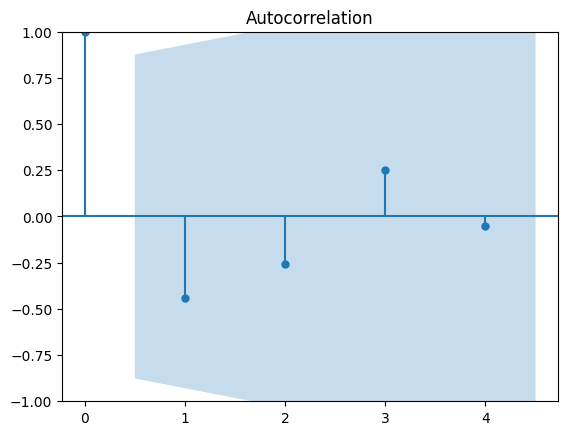

In [6]:
print(acf(df['a']))
plot_acf(df['a']);

## pacf- partial autocorrelation function
The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself<br>
relationship between residual of y(t) and y(t+1) with y(t+1) and so on

In [7]:
pacf_yw(df['a'], nlags=4, method='mle')

array([ 1.        , -0.44367816, -0.56281255, -0.32294613, -0.35874796])

In [8]:
pacf_ols(df['a'], nlags=4)

array([ 1.        , -0.44117647, -0.44186047,  0.57535488,  0.24827586])

In [9]:
from pandas.plotting import lag_plot

The lag plot contains the following axes:
<br><br>
<b>Vertical axis:</b> Yi for all i<br>
<b>Horizontal axis:</b> Yi-k for all i, where k is lag value<br><br>

The lag plot is used to answer the following questions:

* <b>Distribution of Model:</b> Distribution of model here means deciding what is the shape of data on the basis of the lag plot. Below are some examples of lag plot and their original plot:
** If the lag plot is linear, then the underlying structure is of the autoregressive model.
** If the lag plot is of elliptical shape, then the underlying structure represents a continuous periodic function such as sine, cosine, etc.
* <b>Outliers:</b> Outliers are a set of data points that represent the extreme values in the distribution
* <b>Randomness in data:</b> The lag plot is also useful for checking whether the given dataset is random or not. If there is randomness in the data then it will be reflected in the lag plot, if there is no pattern in the lag plot.
* <b>Seasonality:</b> If there is seasonality in the plot then, it will give a periodic lag plot.
* <b>Autocorrelation:</b> If the lag plot gives a linear plot, then it means the autocorrelation is present in the data, whether there is positive autocorrelation or negative that depends upon the slope of the line of the dataset. If more data is concentrated on the diagonal in lag plot, it means there is a strong autocorrelation.

<AxesSubplot:xlabel='Month'>

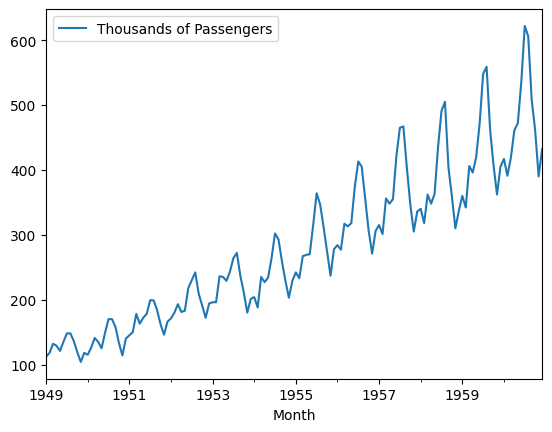

In [3]:
df1.plot()

<AxesSubplot:xlabel='Date'>

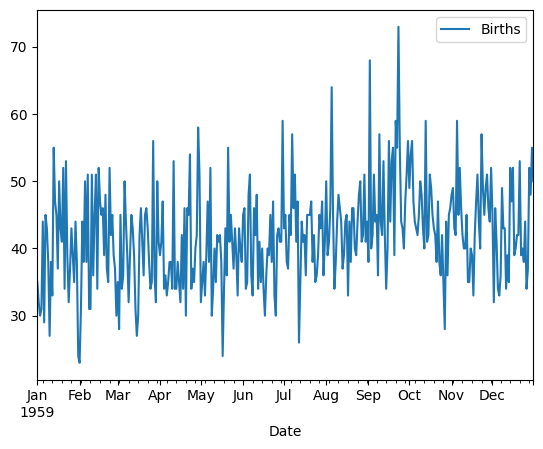

In [11]:
df2.plot()

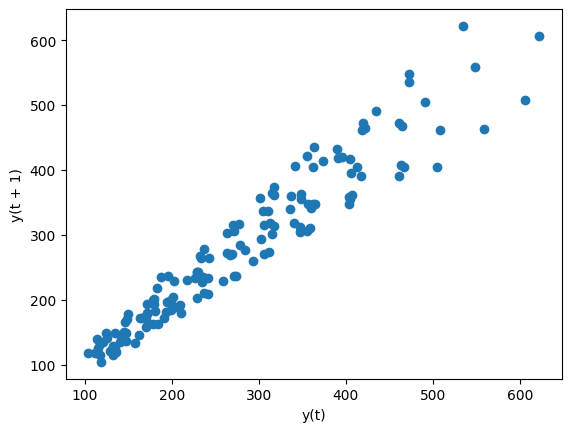

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

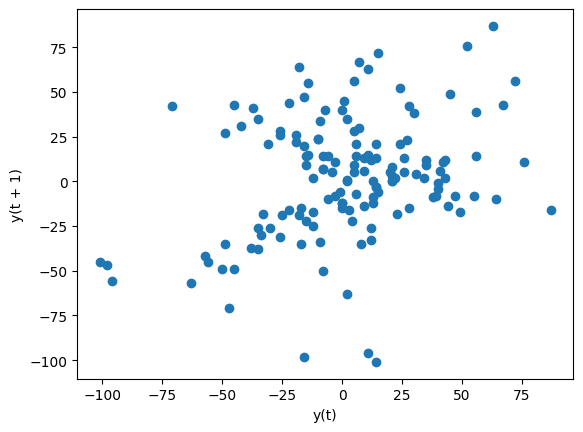

In [16]:
lag_plot(df1['Thousands of Passengers'])
plt.show()
# after removing trend
lag_plot(df1['Thousands of Passengers'].diff())

Strong autocorrelation as per first chart and periodicity/seasonality as per second plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

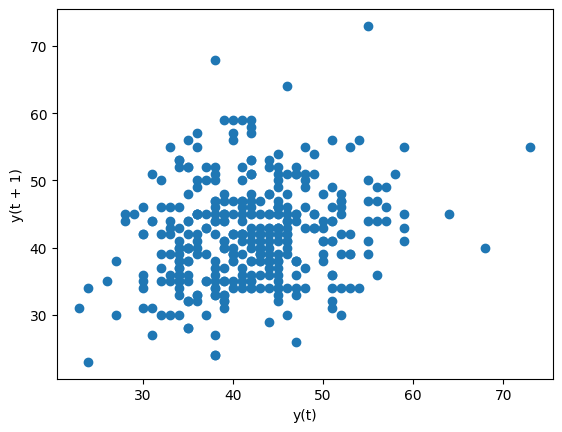

In [35]:
lag_plot(df2['Births'])

No autocorrelation but periodicity

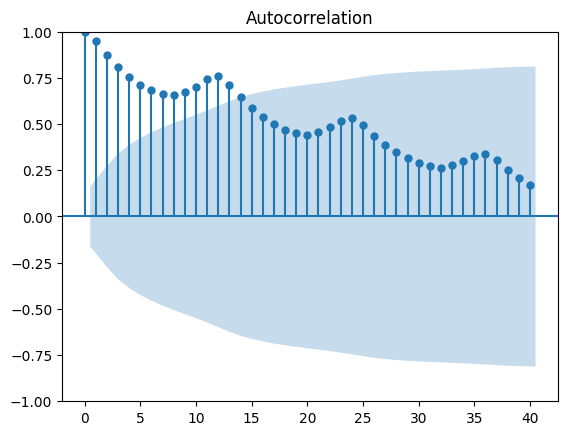

In [14]:
plot_acf(df1, lags=40);

This plot indicates non-stationary data, as the autocorrelations are significant for a large number of lags--but perhaps the autocorrelations at lags 2 and above are merely due to the propagation of the autocorrelation at lag 1. This can be confirmed by the PACF plot.

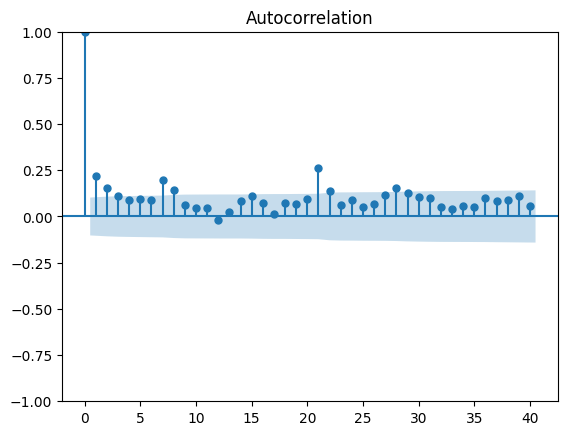

In [39]:
plot_acf(df2, lags=40);

This is a typical ACF plot for stationary data, with lags on the horizontal axis and correlations on the vertical axis. The first value  y0 is always 1. A sharp dropoff indicates that there is no AR component in the ARIMA model.

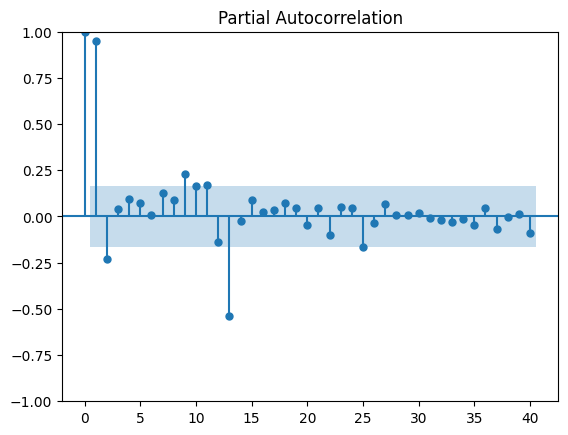

In [16]:
plot_pacf(df1, lags=40);

Note that the PACF plot has a significant spike only at lag 1, meaning that all the higher-order autocorrelations are effectively explained by the lag-1 autocorrelation. <br>
In particular, the partial autocorrelation at lag k is equal to the estimated AR(k) coefficient in an autoregressive model with k terms--i.e., a multiple regression model in which Y is regressed on LAG(Y,1), LAG(Y,2), etc., up to LAG(Y,k). Thus, by mere inspection of the PACF you can determine how many AR terms you need to use to explain the autocorrelation pattern in a time series: if the partial autocorrelation is significant at lag k and not significant at any higher order lags--i.e., if the PACF "cuts off" at lag k--then this suggests that you should try fitting an autoregressive model of order k

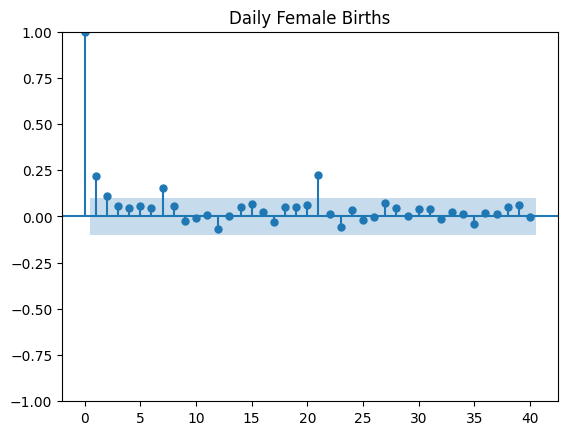

In [42]:
plot_pacf(df2, lags=40, title='Daily Female Births');

The autocorrelation function (ACF) plays the same role for MA terms that the PACF plays for AR terms--that is, the ACF tells you how many MA terms are likely to be needed to remove the remaining autocorrelation from the differenced series. If the autocorrelation is significant at lag k but not at any higher lags--i.e., if the ACF "cuts off" at lag k--this indicates that exactly k MA terms should be used in the forecasting equation. In the latter case, we say that the stationarized series displays an "MA signature"<br><br>
An MA signature is commonly associated with negative autocorrelation at lag 1--i.e., it tends to arise in series which are slightly overdifferenced. The reason for this is that an MA term can "partially cancel" an order of differencing in the forecasting equation.<br><br>
Overall, If the ACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag at which the ACF cuts off is the indicated number of MA terms.
